In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load and preprocess the data

from google.colab import files
fu=files.upload()
data = pd.read_csv("AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]  #

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define a function to create sequences of data for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data.iloc[i+sequence_length].values)  # Use iloc to get the value
    return np.array(X), np.array(y)



# Define hyperparameters
sequence_length = 20  # Length of input sequences
train_size = int(0.8 * len(data))
test_size = len(data) - train_size

# Split the data into training and testing sets
train_data = data[:train_size]
test_data = data[train_size:]

# Create sequences of data
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)



# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=12, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate the Root Mean Squared Error (RMSE) for evaluation
train_rmse = np.sqrt(mean_squared_error(train_data[sequence_length:], train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_data[sequence_length:], test_predictions))

# Visualize the results
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[sequence_length:len(train_predictions) + sequence_length, :] = train_predictions

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predictions) + (sequence_length * 2) + 1:len(data) - 1, :] = test_predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'], label='Actual')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

67/67 [==============================] - 1s 15ms/step


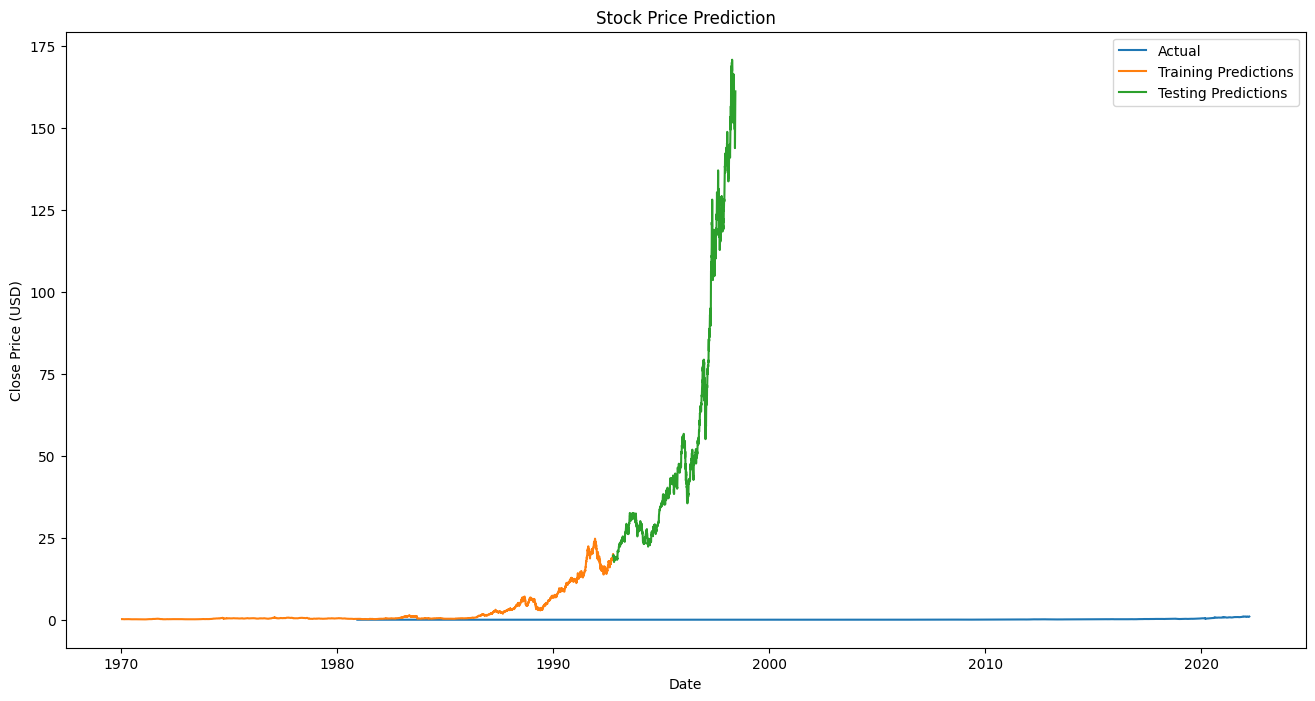

In [ ]:


# Visualize the results
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[sequence_length:len(train_predictions) + sequence_length, 0] = train_predictions[:, 0]

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predictions) + sequence_length:len(train_predictions) + sequence_length + len(test_predictions), 0] = test_predictions[:, 0]

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'], label='Actual')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9986077887730139